In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import pickle
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


from figure_functions import prevplot
from config import (dta_dir,
                    figure_dir,
                    derived_dir)

In [3]:
def plt_prevalence(fname,ax,i, sorted_studies=False):
    
    dta = pd.read_csv(fname, index_col=0)
    
    
    prev = dta[[s + '_%' for s in sorted_studies]]
    N = dta[[s + '_N' for s in sorted_studies]]

    #no sabre in covid < 12 weeks ago -- add empty columns
    if 'l12' in fname:
        prev['sabre_%'] = ['-*' for i in range(prev.shape[0])]
        N['sabre_N'] = ['<10' for i in range(N.shape[0])]
    else:
        prev['sabre_%'] = dta['sabre_%']
        N['sabre_N'] = dta['sabre_N']
        
    N = N.replace('<10',-1)
    prev = prev.replace('<10',-1)
    prev = prev.replace('-*',-1)
    prev = prev.astype(float)

    prev = prev.T
    prev = prev.drop(['sample size'],axis=1)
    
    labeldict = pickle.load(open(derived_dir + 'labeldict.pkl','rb'))
    prev = prev.rename(columns=labeldict)
    
    cols = pd.read_csv(derived_dir + 'sorted_columns_core.csv',index_col=0)
    prev = prev[[c for c in cols['0'].values if c in prev.columns and c!='rash']]
    
    prev = prev.T
    
    col_dict = dict(zip(prev.columns, [c.split('_')[0] for c in prev.columns]))
    
    prev = prev.rename(columns = col_dict)
    
    prevplot(prev,ax,i, l0=True)

In [4]:
files = ['llc_0028_symptom_prevalence_nocovid_data_v1.csv',
         'llc_0028_symptom_prevalence_l12_data_v1.csv',
         'llc_0028_symptom_prevalence_g12_data_v1.csv']

## One plot 

In [5]:
sorted_studies = ['mcs','ncds','bcs70',
                  'nextstep','nhsd46']

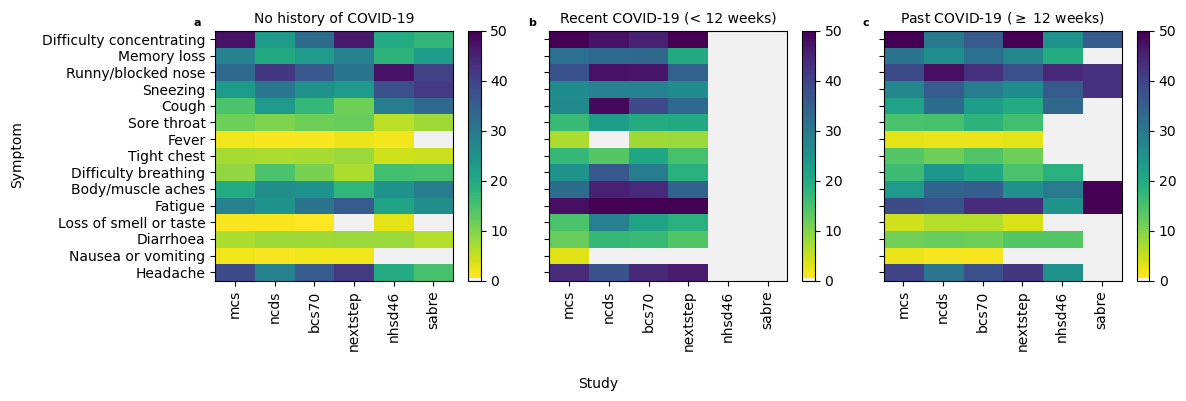

In [6]:
fig,ax_list = plt.subplots(1,3,figsize=(12,4), sharey=True)

titles = [ 'No history of COVID-19','Recent COVID-19 (< 12 weeks)', 'Past COVID-19 ($\geq$ 12 weeks)']
letters = ['a','b','c']
for i,ax in enumerate(ax_list):
    
    plt_prevalence(dta_dir + files[i],ax,i,sorted_studies)
    ax.set_title(titles[i], fontsize=10)
    ax.text(-0.09, 1.02, letters[i],fontsize=8,
            fontweight='bold', c ='k',
            transform=ax.transAxes)
    

fig.supylabel('Symptom',fontsize=10, position=(0.01,0.6))
fig.supxlabel('Study', fontsize=10)
plt.tight_layout()


plt.savefig(figure_dir + 'symptoms.pdf')
plt.savefig(figure_dir + 'symptoms.png',dpi=300)
plt.show()